In [135]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import *

img = cv2.imread("image_01.tif")

if img is None:
    print("Image not found!")
else:
    print("Image loaded successfully!")

Image loaded successfully!


<h1>Q1 - Multiple Kernels<h1>

In [136]:
def zeroPadder(img, kernelRowSize, kernelColSize):
    # considering the image is an RGB image & has 3 channels
    paddedImg = np.zeros((img.shape[0] + (2 * (kernelRowSize // 2)), 
                          img.shape[1] + (2 * (kernelColSize // 2)), 3), 
                         dtype=img.dtype)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            paddedImg[i + (kernelRowSize // 2), j + (kernelColSize // 2), :] = img[i, j, :]

    return paddedImg

In [137]:
def kernelMultiplier(img, kernel):
    img = img.astype(float)

    kernelHeight, kernelWidth = kernel.shape

    outputHeight = img.shape[0] - kernelHeight + 1
    outputWidth  = img.shape[1] - kernelWidth  + 1

    resultImg = np.zeros((outputHeight, outputWidth, 3), dtype=float)

    for i in range(outputHeight):
        for j in range(outputWidth):
            currRegion = img[i : i + kernelHeight, j : j + kernelWidth, :]

            resultImg[i, j, :] = np.sum(
                currRegion * kernel[:, :, None],  # broadcasting the kernel
                axis=(0, 1)
            )

    return resultImg


In [138]:
def clip(img):
    rows, columns, channels = img.shape
    img = img.astype(float)

    for r in range(rows):
        for c in range(columns):
            for ch in range(channels):
                if   img[r, c, ch] > 255:
                     img[r, c, ch] = 255
                elif img[r, c, ch] < 0:
                     img[r, c, ch] = 0

    return img.astype(np.uint8)

In [139]:
def linearContrastStretching(img):
    return ((img - img.min()) / (img.max() - img.min()) * 255).astype(np.uint8)

In [140]:
kernel1 = np.array(([0, 0,   0],
                    [0, 1.5, 0],
                    [0, 0,   0]))

kernel2 = np.array(([0, 1/3, 0],
                    [0, 1/3, 0],
                    [0, 1/3, 0]))

kernel3 = np.array(([1,   1,  1],
                    [0,   0,  0],
                    [-1, -1, -1]))

kernel4 = np.full((3, 3), 1/5) * (5/9)

kernel5 = np.array(([1/4, 0, 1/4],
                    [1/4, 0, 1/4],
                    [1/4, 0, 1/4]))

kernel6 = np.full((3, 3), 1/10) * (10/9)

In [141]:
def showImg(resultImg, operation):
    RGBimg = cv2.cvtColor(resultImg, cv2.COLOR_BGR2RGB)
    plt.title(f"{operation} Result")
    plt.imshow(RGBimg)

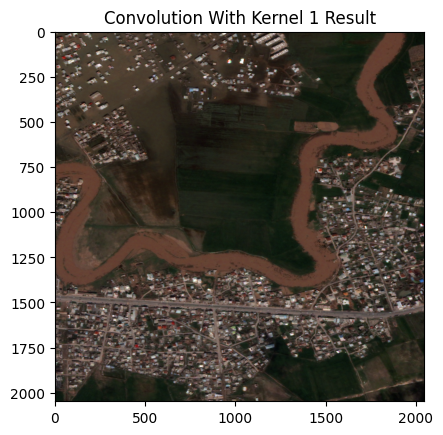

In [54]:
img1 = linearContrastStretching(
       kernelMultiplier(zeroPadder(img, 3, 3), kernel1))
showImg(img1, "Convolution With Kernel 1")

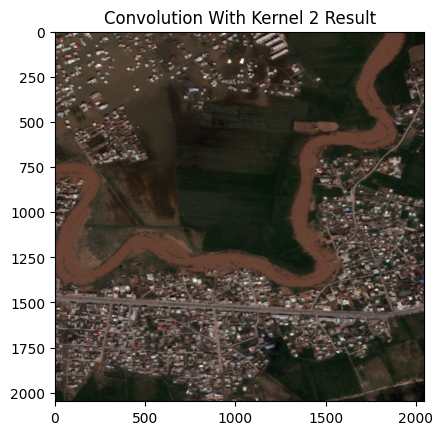

In [142]:
img2 = linearContrastStretching(
       kernelMultiplier(zeroPadder(img, 3, 3), kernel2))
showImg(img2, "Convolution With Kernel 2")

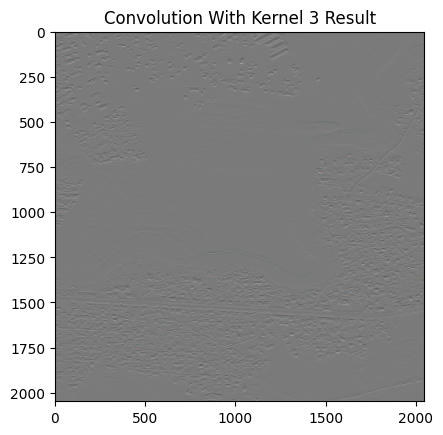

In [69]:
img3 = linearContrastStretching(
       kernelMultiplier(zeroPadder(img, 3, 3), kernel3))
showImg(img3, "Convolution With Kernel 3")

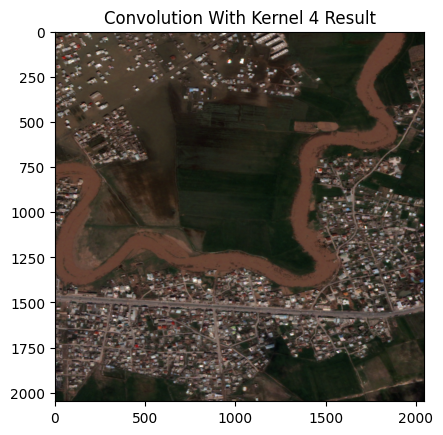

In [145]:
img4 = linearContrastStretching(
       kernelMultiplier(zeroPadder(img, 3, 3), kernel4))
showImg(img4, "Convolution With Kernel 4")

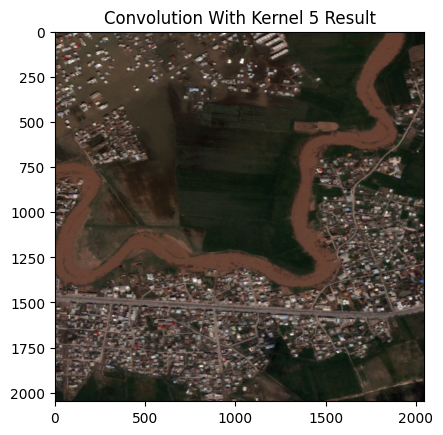

In [146]:
img5 = linearContrastStretching(
       kernelMultiplier(zeroPadder(img, 3, 3), kernel5))
showImg(img5, "Convolution With Kernel 5")

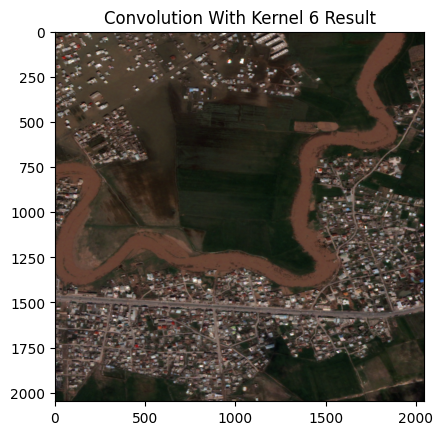

In [71]:
img6 = linearContrastStretching(
       kernelMultiplier(zeroPadder(img, 3, 3), kernel6))
showImg(img6, "Convolution With Kernel 6")

<h2>Q2 - Gaussian Kernel<h2>

In [147]:
def gaussianKernelGenerator(kernelSize):
    gaussianKernel = np.ones((kernelSize, kernelSize))
    center         = gaussianKernel.shape[0] // 2
    gaussianStd    = 6 / gaussianKernel.shape[0]

    for r in range(gaussianKernel.shape[0]):
        for c in range(gaussianKernel.shape[1]):
            rowDist = abs(center - r)
            colDist = abs(center - c)

            d = sqrt(pow(rowDist, 2) + pow(colDist, 2))
            G = exp((-(pow(d, 2))) / (2 * pow(gaussianStd, 2))) 
            
            gaussianKernel[r, c] = G

    normalizedGaussianKernel = gaussianKernel / np.sum(gaussianKernel)
    return normalizedGaussianKernel

gaussianKernel = gaussianKernelGenerator(kernelSize=7)
gaussianKernel

array([[1.03662232e-06, 3.11478568e-05, 2.39945570e-04, 4.73886415e-04,
        2.39945570e-04, 3.11478568e-05, 1.03662232e-06],
       [3.11478568e-05, 9.35913651e-04, 7.20975238e-03, 1.42390781e-02,
        7.20975238e-03, 9.35913651e-04, 3.11478568e-05],
       [2.39945570e-04, 7.20975238e-03, 5.55398773e-02, 1.09689849e-01,
        5.55398773e-02, 7.20975238e-03, 2.39945570e-04],
       [4.73886415e-04, 1.42390781e-02, 1.09689849e-01, 2.16634669e-01,
        1.09689849e-01, 1.42390781e-02, 4.73886415e-04],
       [2.39945570e-04, 7.20975238e-03, 5.55398773e-02, 1.09689849e-01,
        5.55398773e-02, 7.20975238e-03, 2.39945570e-04],
       [3.11478568e-05, 9.35913651e-04, 7.20975238e-03, 1.42390781e-02,
        7.20975238e-03, 9.35913651e-04, 3.11478568e-05],
       [1.03662232e-06, 3.11478568e-05, 2.39945570e-04, 4.73886415e-04,
        2.39945570e-04, 3.11478568e-05, 1.03662232e-06]])

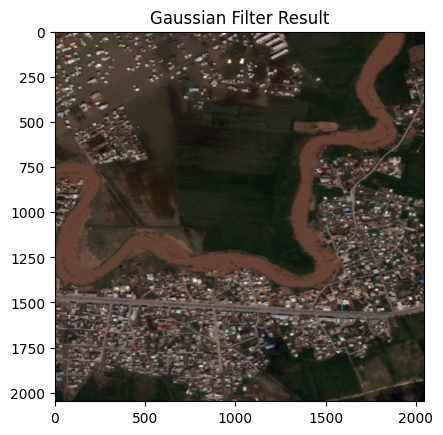

In [148]:
gaussianImg = linearContrastStretching(
              kernelMultiplier(zeroPadder(img, 7, 7), gaussianKernel))
showImg(gaussianImg, "Gaussian Filter")

<h2>Q3 - Box Filter<h2>

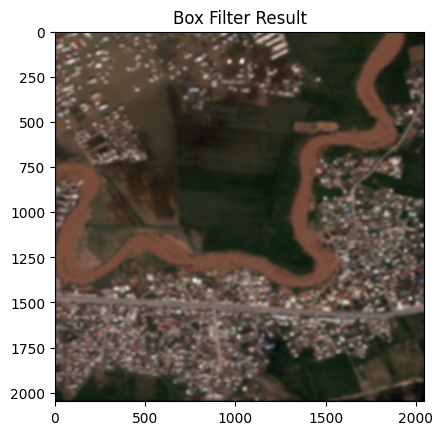

In [149]:
boxFilter           = np.ones((21, 21)) 
normalizedBoxFilter = boxFilter / np.sum(boxFilter)

boxFilterImg = linearContrastStretching(
               kernelMultiplier(zeroPadder(img, 21, 21), normalizedBoxFilter))
showImg(boxFilterImg, "Box Filter")

In [ ]:
rowBoxFilter              = np.ones((1, 21))
columnBoxFilter           = np.ones((21, 1)) 
normalizedRowBoxFilter    = rowBoxFilter    / np.sum(rowBoxFilter)
normalizedColumnBoxFilter = columnBoxFilter / np.sum(columnBoxFilter)

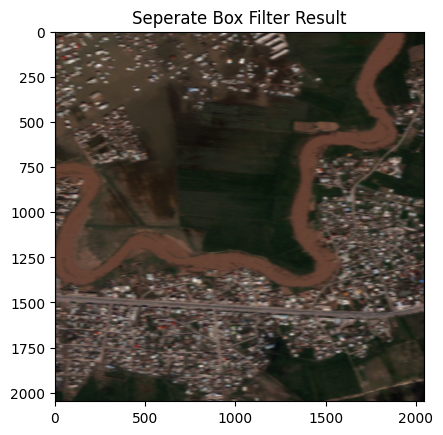

In [ ]:
rowBoxFilterImg   = kernelMultiplier(
    zeroPadder(img, kernelRowSize=1, kernelColSize=21),
    normalizedRowBoxFilter
)
rowBoxFilterImgResult = clip(rowBoxFilterImg)
showImg(rowBoxFilterImgResult, "Seperate Box Filter")


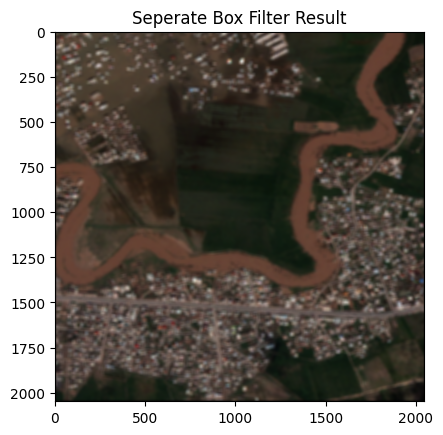

In [151]:
columnBoxFilterImg = kernelMultiplier(
    zeroPadder(rowBoxFilterImg, kernelRowSize=21, kernelColSize=1),
    normalizedColumnBoxFilter
)
finalImg = clip(columnBoxFilterImg)
showImg(finalImg, "Seperate Box Filter")

<h2>Q4 - Salt & Pepper Noise<h2>

In [143]:
def saltPepperApplier(img, pepperPercentage):
    saltPercentage   = 1 - pepperPercentage
    noisyImg         = img.copy()
    rows, columns, _ = img.shape

    for r in range(rows):
        for c in range(columns):
            rnd = np.random.random()
            if rnd < pepperPercentage:
                noisyImg[r, c] = [0, 0, 0]
            elif rnd > saltPercentage:
                noisyImg[r, c] = [255, 255, 255]

    return noisyImg

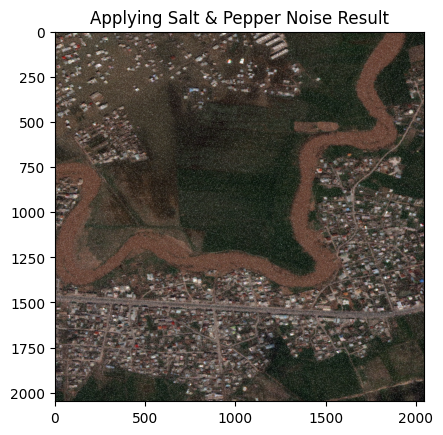

In [ ]:
noisyImg = saltPepperApplier(img, 0.05)
showImg(noisyImg, "Applying Salt & Pepper Noise")

In [158]:
def medianFilter(img, kernelRowSize, kernelColSize):
    outputHeight = img.shape[0] - kernelRowSize  + 1
    outputWidth  = img.shape[1] - kernelColSize  + 1

    resultImg = np.zeros((outputHeight, outputWidth, 3), dtype=float)

    for r in range(outputHeight):
        for c in range(outputWidth):
            currRegion = img[r : r + kernelRowSize, c : c + kernelColSize, :]
            resultImg[r, c, :] = np.median(currRegion, axis=(0, 1))

    return resultImg.astype(np.uint8)

In [159]:
def maxFilter(img, kernelRowSize, kernelColSize):
    outputHeight = img.shape[0] - kernelRowSize  + 1
    outputWidth  = img.shape[1] - kernelColSize  + 1

    resultImg = np.zeros((outputHeight, outputWidth, 3), dtype=float)

    for r in range(outputHeight):
        for c in range(outputWidth):
            currRegion = img[r : r + kernelRowSize, c : c + kernelColSize, :]
            resultImg[r, c, :] = np.max(currRegion, axis=(0, 1))

    return resultImg.astype(np.uint8)

In [160]:
def minFilter(img, kernelRowSize, kernelColSize):
    outputHeight = img.shape[0] - kernelRowSize  + 1
    outputWidth  = img.shape[1] - kernelColSize  + 1

    resultImg = np.zeros((outputHeight, outputWidth, 3), dtype=float)

    for r in range(outputHeight):
        for c in range(outputWidth):
            currRegion = img[r : r + kernelRowSize, c : c + kernelColSize, :]
            resultImg[r, c, :] = np.min(currRegion, axis=(0, 1))

    return resultImg.astype(np.uint8)

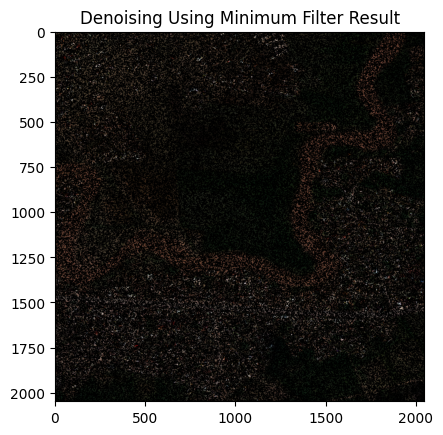

In [161]:
minImg = minFilter(zeroPadder(noisyImg, 5, 5), 5, 5)
showImg(minImg, "Denoising Using Minimum Filter")

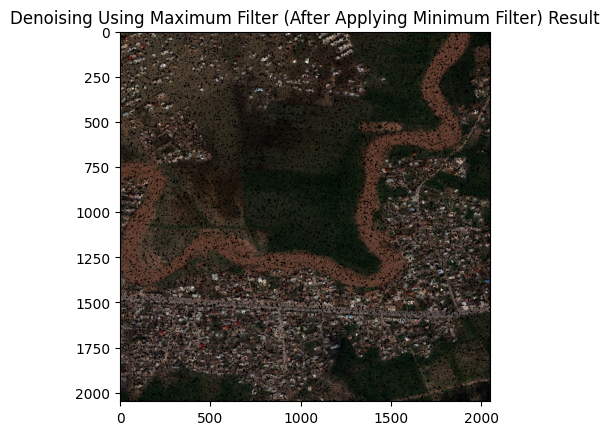

In [162]:
maxImg = maxFilter(zeroPadder(minImg, 5, 5), 5, 5)
showImg(maxImg, "Denoising Using Maximum Filter (After Applying Minimum Filter)")

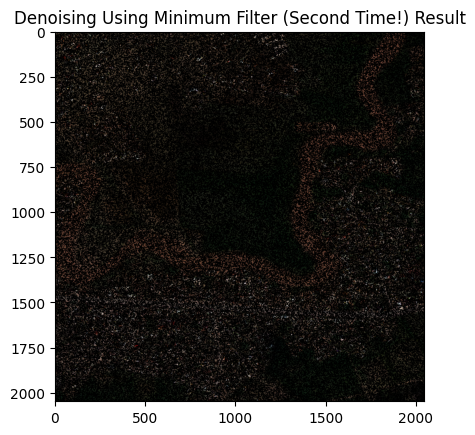

In [163]:
minImg2 = minFilter(zeroPadder(maxImg, 5, 5), 5, 5)
showImg(minImg2, "Denoising Using Minimum Filter (Second Time!)")

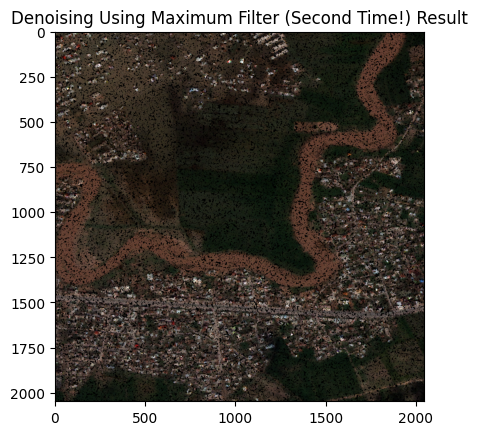

In [164]:
maxImg2 = maxFilter(zeroPadder(minImg2, 5, 5), 5, 5)
showImg(maxImg2, "Denoising Using Maximum Filter (Second Time!)")

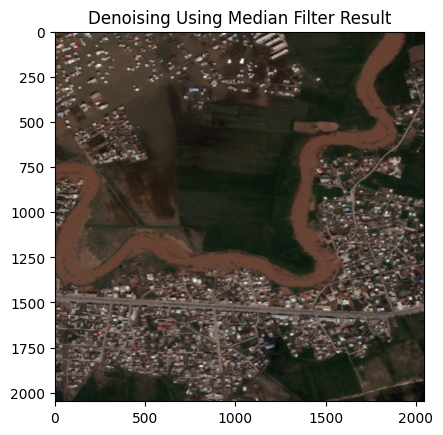

In [165]:
medianImg = medianFilter(zeroPadder(noisyImg, 5, 5), 5, 5)
showImg(medianImg, "Denoising Using Median Filter")

<h2>Q5 - Highboost Filter<h2>

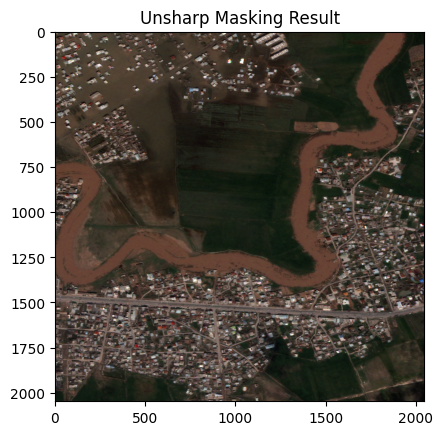

In [ ]:
gaussianKernel = gaussianKernelGenerator(kernelSize=5)
gaussianResult = kernelMultiplier(zeroPadder(img, 5, 5), gaussianKernel)
mask           = img.astype(float) - gaussianResult

k = 1
unsharpedImg = img.astype(float) + (k * mask)
# value changes resulted by the filter are so subtle
# using clip instead of linear contrast stretching!
unsharpedImg = clip(unsharpedImg)
showImg(unsharpedImg, "Unsharp Masking")

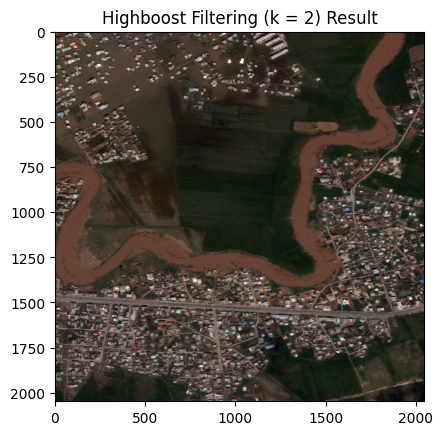

In [168]:
k = 2
highbooestedImg1 = img.astype(float) + (k * mask)
highbooestedImg1 = clip(highbooestedImg1)
showImg(highbooestedImg1, "Highboost Filtering (k = 2)")

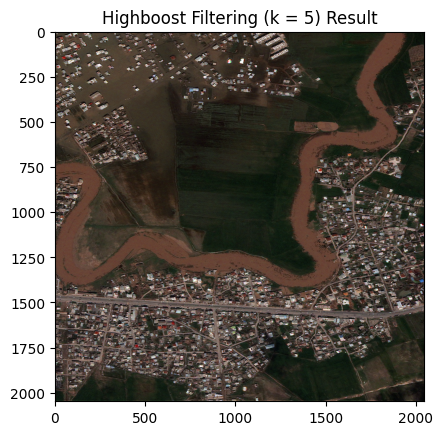

In [169]:
k = 5
highbooestedImg2 = img.astype(float) + (k * mask)
highbooestedImg2 = clip(highbooestedImg2)
showImg(highbooestedImg2, "Highboost Filtering (k = 5)")

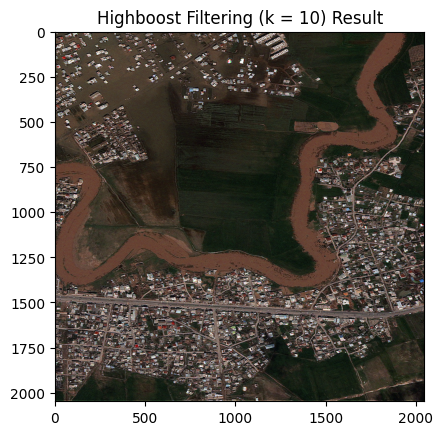

In [170]:
k = 10 
highbooestedImg3 = img.astype(float) + (k * mask)
highbooestedImg3 = clip(highbooestedImg3)
showImg(highbooestedImg3, "Highboost Filtering (k = 10)")

<h2>Q6 - Laplacian Filter<h2>

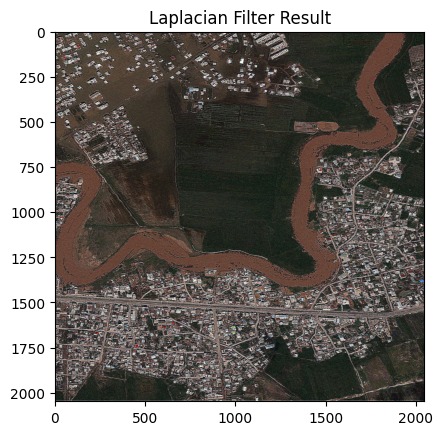

In [171]:
laplacianFilter = np.array(([1, 1,  1],
                            [1, -8, 1],
                            [1,  1, 1])) 

laplacianResult = kernelMultiplier(zeroPadder(img, 3, 3), laplacianFilter)

c         = 5 # not appropriate, just did it to make it more clear!
resultImg = img.astype(float) - (c * laplacianResult)

# linear contrast stretching was not working!
resultImg = clip(resultImg)
showImg(resultImg, "Laplacian Filter")

<h2>Q7 - Sobel Kernel<h2>

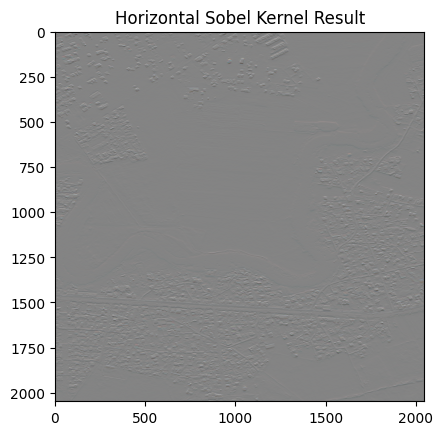

In [172]:
horizontalSobel = np.array(([-1, -2, -1], 
                            [0,   0,  0], 
                            [1,   2,  1]))

resultImg = linearContrastStretching(
            kernelMultiplier(zeroPadder(img, 3, 3), horizontalSobel))
showImg(resultImg, "Horizontal Sobel Kernel")

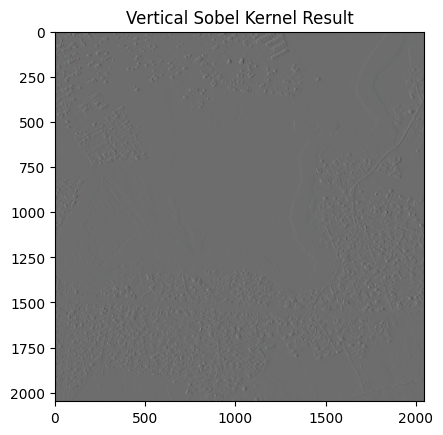

In [173]:
verticalSobel = np.array(([-1, 0, 1], 
                          [-2, 0, 2], 
                          [-1, 0, 1]))

resultImg = linearContrastStretching(
            kernelMultiplier(zeroPadder(img, 3, 3), verticalSobel))
showImg(resultImg, "Vertical Sobel Kernel")